## Perkenalan

Nama: Sivi Almanaf Ali Shahab

Batch: 006

## Kickstarter Projects

#### Context
I'm a crowdfunding enthusiast and i'm watching kickstarter since its early days. Right now I just collect data and the only app i've made is this twitter bot which tweet any project reaching some milestone: @bloomwatcher . I have a lot of other ideas, but sadly not enough time to develop them… But I hope you can!

#### Content

You'll find most useful data for project analysis. Columns are self explanatory except:

usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter).

usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API).

usd goal real: conversion in US dollars of the goal column (conversion from Fixer.io API).

#### Acknowledgements

Data are collected from Kickstarter Platform

usd conversion (usdpledgedreal and usdgoalreal columns) were generated from convert ks pledges to usd script done by tonyplaysguitar

## Import Library

Before starting, you need to have the opendatasets library installed in your system.


In [330]:
!pip install opendatasets --q

In [331]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

The process to Download is as follows:

In [332]:
dataset_url = 'https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv'

The dataset can now be downloaded using od.download. When you execute od.download, you will be asked to provide your Kaggle username and API key. Follow these instructions to create an API key: http://bit.ly/kaggle-creds

In [333]:
od.download(dataset_url)

Skipping, found downloaded files in ".\kickstarter-projects" (use force=True to force download)


In [334]:
df_ks_projects = pd.read_csv('./kickstarter-projects/ks-projects-201801.csv')

In [335]:
df_ks_projects.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [336]:
df_ks_projects.shape

(378661, 15)

In [337]:
df_ks_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


## Data Cleaning

### I. Change Data Types

In [338]:
df = df_ks_projects.copy()

Setelah kita cek type data dari masing-masing kolom, ada beberapa data yang masih belum sesuai dengan tipe datanya yang asli. Mari kita rubah dulu ke tipe data yang sesuai sebagai berikut:

In [339]:
df['ID'] = df['ID'].astype(str)
df['deadline'] = pd.to_datetime(df['deadline']).dt.date
df['launched'] = pd.to_datetime(df['launched']).dt.date

In [340]:
df.set_index('ID', inplace=True)

In [341]:
df = df.sort_values(by="launched")
df.tail()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1610076616,The Adventures of Ife and Riff Raff,Animation,Film & Video,USD,2018-02-01,20000.0,2018-01-02,0.0,live,0,US,0.0,0.0,20000.0
279884677,Islands in the Formless Void,Games,Games,USD,2018-02-01,26100.0,2018-01-02,35.0,live,1,US,35.0,35.0,26100.0
403418788,Color Pixel - Paint By Number (Build a #1 Rank...,Mobile Games,Games,USD,2018-02-01,500000.0,2018-01-02,0.0,live,0,US,0.0,0.0,500000.0
497046223,Children of the Apocalypse for Savage Worlds,Tabletop Games,Games,USD,2018-02-01,6500.0,2018-01-02,547.0,live,13,US,547.0,547.0,6500.0
2097698565,Trippy Art Shop Custom Shoes & Art,Painting,Art,USD,2018-01-17,1000.0,2018-01-02,0.0,live,0,US,0.0,0.0,1000.0


### II. Handling Missing Values

Cek data missing values

In [342]:
df.isnull().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Handling missing values with input '-' and 0.0 in column 'name' and 'usd pledged' respectively 

In [343]:
df['name'].fillna('-', inplace=True)

In [344]:
df['usd pledged'].fillna(0.0, inplace=True)

In [345]:
df.isnull().sum()

name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

## Eksplorasi Data

Pertama kita akan melihat status dari kickstarter crowdfunding sejak pertama di inisialisasi

In [346]:
df['state'].unique()

array(['canceled', 'suspended', 'failed', 'successful', 'undefined',
       'live'], dtype=object)

<AxesSubplot:title={'center':'Status Crowdfunding'}, ylabel='state'>

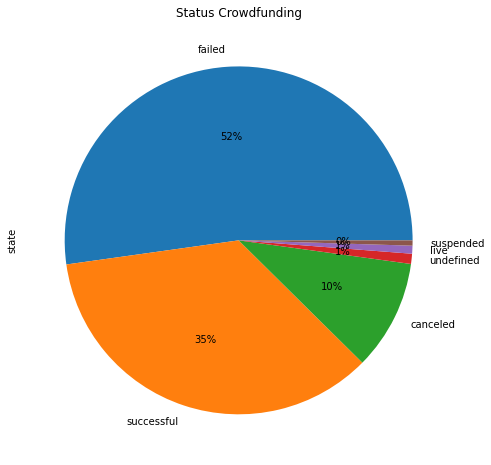

In [347]:
state = df['state'].value_counts()
state.plot(kind='pie', figsize=[16, 8], autopct='%1.0f%%', title="Status Crowdfunding")

Dari pie chart dapat dilihat bahwa status kickstarter crowdfunding adalah 52% failed, 35% success, 10% canceled dan sisanya 3% terdiri dari supended live and undefined  

In [348]:
df['country'].unique()

array(['US', 'CH', 'N,0"', 'GB', 'CA', 'AU', 'NZ', 'NL', 'SE', 'DK', 'NO',
       'IE', 'DE', 'FR', 'ES', 'IT', 'BE', 'AT', 'LU', 'SG', 'HK', 'MX',
       'JP'], dtype=object)

In [349]:
df_country_success = df[(df['state']=='successful')]

In [350]:
df_country_success.shape

(133956, 14)

<AxesSubplot:title={'center':'Successful Crowdfunding based on country'}, ylabel='country'>

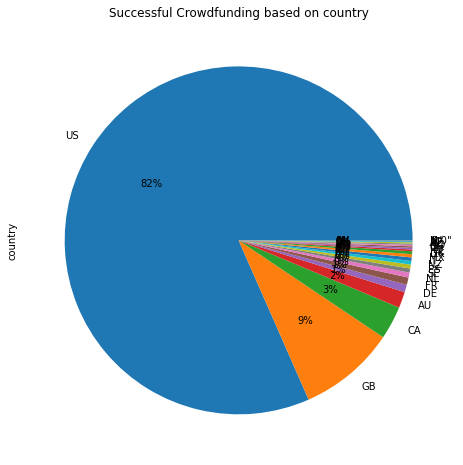

In [351]:
country_success = df_country_success['country'].value_counts()
country_success.plot(kind='pie', figsize=[16, 8], autopct='%1.0f%%', title="Successful Crowdfunding based on country")

Dari pie chart dapat dilihat bahwa kickstarter crowdfunding dengan status successful mayoritas adalah berasal dari negara US sebanyak 82% 

<AxesSubplot:title={'center':'Successful Crowdfunding based on category'}, ylabel='main_category'>

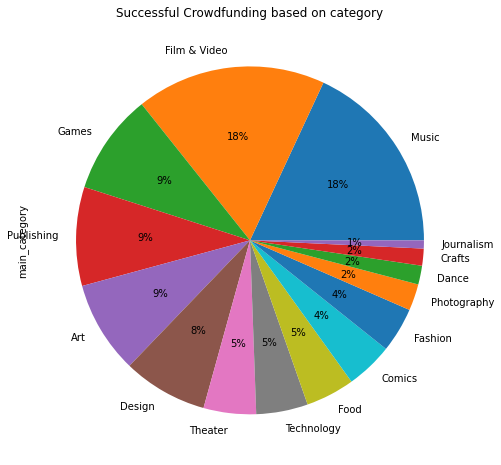

In [352]:
category_success = df_country_success['main_category'].value_counts()
category_success.plot(kind='pie', figsize=[16, 8], autopct='%1.0f%%', title="Successful Crowdfunding based on category")


In [353]:
df_US_successful = df[(df['state']=='successful') & (df['country']=='US')]
df_US_successful.shape

(109299, 14)

<AxesSubplot:title={'center':'Successful Crowdfunding based on category in US'}, ylabel='main_category'>

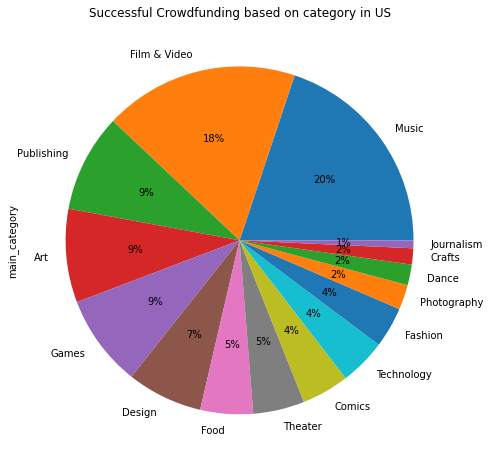

In [354]:
df_US_successful_category = df_US_successful['main_category'].value_counts()
df_US_successful_category.plot(kind='pie', figsize=[16, 8], autopct='%1.0f%%', title="Successful Crowdfunding based on category in US")

In [355]:
df_top_category = df_US_successful[(df['main_category']=='Film & Video') | (df['main_category']=='Music')]

C:\Users\sivis\AppData\Local\Temp/ipykernel_18092/2781851041.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top_category = df_US_successful[(df['main_category']=='Film & Video') | (df['main_category']=='Music')]


In [356]:
df_top_category.shape

(41500, 14)

 ## Measure of Central Tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics. The mean (often called the average) is most likely the measure of central tendency that you are most familiar with, but there are others, such as the median and the mode.

In [357]:
df_top_category.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,4.150000e+04,4.150000e+04,41500.000000,4.150000e+04,4.150000e+04,4.150000e+04
mean,8.715629e+03,1.100114e+04,130.782554,9.819453e+03,1.100114e+04,8.715629e+03
std,2.627264e+04,5.165063e+04,685.655890,5.051545e+04,5.165063e+04,2.627264e+04
min,1.000000e+00,1.000000e+00,1.000000,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.625000e+03,2.071000e+03,31.000000,1.540000e+03,2.071000e+03,1.625000e+03
50%,4.000000e+03,4.948280e+03,61.000000,4.001000e+03,4.948280e+03,4.000000e+03
75%,9.997500e+03,1.041300e+04,118.000000,9.533955e+03,1.041300e+04,9.997500e+03
max,2.000000e+06,5.764229e+06,91585.000000,5.764229e+06,5.764229e+06,2.000000e+06


Setelah melakukan eksplorasi data, data yang akan kita gunakan adalah df_top_category yaitu data yang udah di filter dengan beberapa ketentuan sebagai berikut:

(state == 'successful' and country == 'US') and (main_category == 'Film & Video' or main_category == 'Music')

### I. Mean

Kita akan mencari mean dari kolom usd_goal_real, mean masing-masing untuk kategori 'Film & Video' dan 'Music'

In [358]:
# check top 5 data
df_top_category.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1099226462,Logical Guess Pictures' 2nd Horror Movie!,Film & Video,Film & Video,USD,2009-06-06,500.0,2009-04-30,501.66,successful,22,US,501.66,501.66,500.0
405307432,Electronola - An electronic gumbo of New Orlea...,Electronic Music,Music,USD,2009-06-05,4000.0,2009-05-01,4100.60,successful,114,US,4100.60,4100.60,4000.0
2096107260,As The Dust Settles,Film & Video,Film & Video,USD,2009-06-02,200.0,2009-05-03,202.00,successful,7,US,202.00,202.00,200.0
1100844465,daily digest,Documentary,Film & Video,USD,2009-06-01,700.0,2009-05-04,700.00,successful,14,US,700.00,700.00,700.0
585544140,"Unbunny's ""Black Strawberries"" Limited-Edition LP",Indie Rock,Music,USD,2009-07-06,3500.0,2009-05-05,3690.00,successful,132,US,3690.00,3690.00,3500.0


In [359]:
usd_film_video = df_top_category[(df['main_category']=='Film & Video')]['usd_goal_real'].mean()

usd_music = df_top_category[(df['main_category']=='Music')]['usd_goal_real'].mean()

print('Rata-rata usd goal successful dari Film & Video di US: ', round(usd_film_video))
print("-"*100)
print('Rata-rata usd goal successful dari Music di US: ', round(usd_music))

Rata-rata usd goal successful dari Film & Video di US:  11872
----------------------------------------------------------------------------------------------------
Rata-rata usd goal successful dari Music di US:  5841


C:\Users\sivis\AppData\Local\Temp/ipykernel_18092/2052341.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  usd_film_video = df_top_category[(df['main_category']=='Film & Video')]['usd_goal_real'].mean()
C:\Users\sivis\AppData\Local\Temp/ipykernel_18092/2052341.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  usd_music = df_top_category[(df['main_category']=='Music')]['usd_goal_real'].mean()


### II. Median

Untuk mencari median kita tidak perlu mengurutkan data mulai dari yang terkecil.

Kita akan mencari median dari kolom usd_goal_real, median masing-masing untuk kategori 'Film & Video' dan 'Music'

In [360]:
usd_film_video_med = df_top_category[(df['main_category']=='Film & Video')]['usd_goal_real'].median()


usd_music_med = df_top_category[(df['main_category']=='Music')]['usd_goal_real'].median()

print('Median usd goal successful dari Film & Video di US: ', round(usd_film_video_med))
print("-"*100)
print('Median usd goal successful dari Music di US: ', round(usd_music_med))

Median usd goal successful dari Film & Video di US:  5000
----------------------------------------------------------------------------------------------------
Median usd goal successful dari Music di US:  3500


C:\Users\sivis\AppData\Local\Temp/ipykernel_18092/1082822340.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  usd_film_video_med = df_top_category[(df['main_category']=='Film & Video')]['usd_goal_real'].median()
C:\Users\sivis\AppData\Local\Temp/ipykernel_18092/1082822340.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  usd_music_med = df_top_category[(df['main_category']=='Music')]['usd_goal_real'].median()


### III. Mode

Kita akan mencari modus dari kolom main_category, data mana yang paling sering muncul antara 'Film & Video' dan 'Music'

In [361]:
print("Modus dari variabel main_category adalah di US:", df_top_category['main_category'].mode().sum())

Modus dari variabel main_category adalah di US: Music


<AxesSubplot:title={'center':'Perbandingan Jumlah Film & Video dan Music'}>

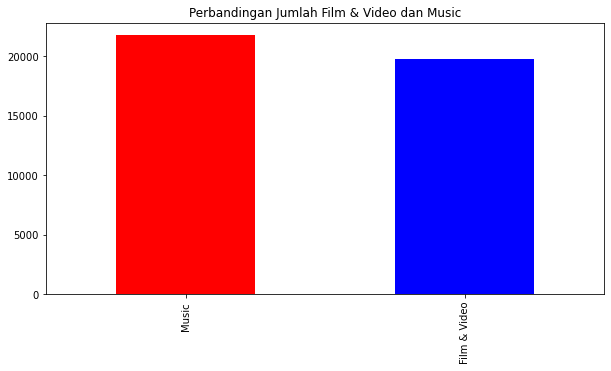

In [362]:
main_category = df_top_category['main_category'].value_counts()
main_category.plot(kind='bar', color=['r', 'b'], figsize=[10, 5], title="Perbandingan Jumlah Film & Video dan Music")

In [363]:
print('Jumlah data Film & Video di US:', df_top_category[(df['main_category']=='Film & Video')]['main_category'].count())
print("-"*100)
print('Jumlah data control Music di US:', df_top_category[(df['main_category']=='Music')]['main_category'].count())

Jumlah data Film & Video di US: 19782
----------------------------------------------------------------------------------------------------
Jumlah data control Music di US: 21718


C:\Users\sivis\AppData\Local\Temp/ipykernel_18092/372353659.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Jumlah data Film & Video di US:', df_top_category[(df['main_category']=='Film & Video')]['main_category'].count())
C:\Users\sivis\AppData\Local\Temp/ipykernel_18092/372353659.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Jumlah data control Music di US:', df_top_category[(df['main_category']=='Music')]['main_category'].count())


## Measure of Variance

Calculate variance and standard deviation for all the numeric columns

In [364]:
# Variance di US
print("Numeric columns Variance di US")
print(df_top_category.var())
print("")
# Standard deviation di US
print("Numeric columns Standard Deviation di US")
print(df_top_category.std())
print("")
#Range di US
num_columns = df_top_category.describe().columns
print("Numeric columns Range di US")
print(df_top_category[num_columns].max()-df_top_category[num_columns].min())

Numeric columns Variance di US
goal                6.902515e+08
pledged             2.667788e+09
backers             4.701240e+05
usd pledged         2.551810e+09
usd_pledged_real    2.667788e+09
usd_goal_real       6.902515e+08
dtype: float64

Numeric columns Standard Deviation di US
goal                26272.636915
pledged             51650.630536
backers               685.655890
usd pledged         50515.446613
usd_pledged_real    51650.630536
usd_goal_real       26272.636915
dtype: float64

Numeric columns Range di US
goal                1999999.00
pledged             5764228.38
backers               91584.00
usd pledged         5764229.38
usd_pledged_real    5764228.38
usd_goal_real       1999999.00
dtype: float64


## Hypothesis Testing

### I. One Sample One Tailed

In [365]:
#df_top_category_daily = df_top_category.groupby(pd.Grouper(key='launched', axis=0, freq='D')).sum()

In [366]:
df_US_GB_successful = df_country_success[(df['country']=='US') | (df['country']=='GB')]
df_US_GB_successful.head()

C:\Users\sivis\AppData\Local\Temp/ipykernel_18092/3474011238.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_US_GB_successful = df_country_success[(df['country']=='US') | (df['country']=='GB')]


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,20.0,2009-04-24,35.0,successful,3,US,35.0,35.0,20.0
727286,Offline Wikipedia iPhone app,Software,Technology,USD,2009-07-14,99.0,2009-04-25,145.0,successful,25,US,145.0,145.0,99.0
2089078683,New York Makes a Book!!,Journalism,Journalism,USD,2009-05-16,3000.0,2009-04-28,3329.0,successful,110,US,3329.0,3329.0,3000.0
469734648,kicey to iceland,Photography,Photography,USD,2009-06-17,350.0,2009-04-29,1630.0,successful,31,US,1630.0,1630.0,350.0
515267366,Crossword Puzzles!,Puzzles,Games,USD,2009-06-30,1500.0,2009-04-29,2265.0,successful,163,US,2265.0,2265.0,1500.0


Kita akan fokus pada main_category Film & Video yang statusnya dalah succesful.
Rata-rata usd goal crowdfunding yg di US adalah $11,872, sedangkan rata-rata untuk usd goal crowdfunding secara kesuluruhan adalah $11,145. Kita ingin melihat apakah usd goal yang ada di US memiliki dampak yang signifikan terhadap total usd goal crowdfunding.

**H0: μ <= \$11,333**

**H1: μ > \$11,333**


Pertama kita batasi data dengan state == successfull. Hasil rata-rata usd_goal_real dari Film & Video pada pembahasan measure of tendency untuk kategori state == successfull dan dibatasi pada main_category Film & Video dan Music dihasilkan rata-rata usd_goal_real dari Film & Video adalah $11,872

Untuk mengecek apakah hasil dari usd goal yg didapatkan dari industri Film & Video yang statusnya adalah successful kita menduga bahwa rata-rata dari usd_goal_real Film & video (data: top_category) tidak berbeda secara significant dengan rata-rata populasi (state==successfull). Kita asumsikan rata-rata tidak lebih dari $11,500 (menggunakan sampel yang lebih banyak) dengan significant level 0.05 maka kita bisa buat dengan hipotesis berikut ini:


**H0: μ <= \$11,500**

**H1: μ > \$11,500**

Kita akan gunakan data df_country_success yaitu berisi data dengan state==successful untuk semua main_category

In [367]:
USGB_mean_usd_film_video = df_US_GB_successful[(df_US_GB_successful['main_category']=='Film & Video')]['usd_goal_real'].mean()

In [368]:
print('Average Film & Video usd goal state successfull: ${}'.format(np.round(USGB_mean_usd_film_video)))

Average Film & Video usd goal state successfull: $11333.0


In [369]:
df_country_success.shape

(133956, 14)

In [370]:
film_video = df_country_success[(df_country_success['main_category']=='Film & Video')]

In [371]:
film_video.shape

(23623, 14)

In [372]:
t_stat, p_val = stats.ttest_1samp(film_video['usd_goal_real'], 11000)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.2565465633632651
t-statistics: 0.6540388757389172


C:\Users\sivis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


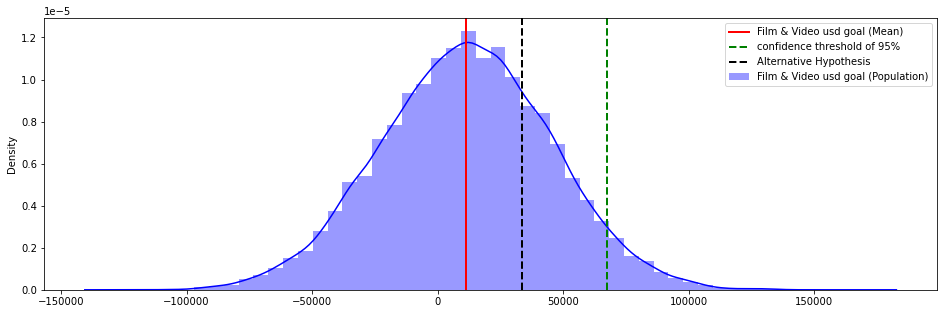

In [373]:
film_video_pop = np.random.normal(film_video['usd_goal_real'].mean(), film_video['usd_goal_real'].std(), 20000)

ci = stats.norm.interval(0.90, film_video['usd_goal_real'].mean(), film_video['usd_goal_real'].std())

plt.figure(figsize=(16,5))
sns.distplot(film_video_pop, label='Film & Video usd goal (Population)', color='blue')
plt.axvline(film_video_pop.mean(), color='red', linewidth=2, label='Film & Video usd goal (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(film_video_pop.mean() + t_stat*film_video_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

### II. One Sample Two Tailed

Perusahaan Kickstarter crowdfunding ingin meneliti keberhasilan crowdfunding di bidang Film & Video. Perusahaan mengklaim bahwa rata-rata goal secara keseluruhan dengan status sukses yang didapatkan dlm USD setara atau tidak berbeda secara signifikan dengan rata-rata goal dengan status sukses yang didapatkan dari dua negara dengan jumlah goal terbesar yaitu US dan GB. 
Sample dari 20000 goal dalam usd dari data keseluruhan akan digunkan untuk mengkalim hipotesis tersebut dengan significant level 0.05.
Rata-rata goal dengan status sukses yang didapatkan dari dua negara dengan jumlah goal terbesar yaitu US dan GB adalah berkisar antara $11,300.

Our hypothesis on this case:

**H0: μ =\$11,300**

**H1: μ != \$11,300**

In [383]:
df_success_film_video = df[(df['state']=='successful') & (df['main_category']=='Film & Video')]
df_success_film_video['usd_goal_real'].mean()

11145.188408330841

In [379]:
t_stat,p_val = stats.ttest_1samp(df_success_film_video['usd_goal_real'], 11300)
print('P-value:',p_val) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.4855662451482077
t-statistics: -0.6973890032315399


In [375]:
us_gb_film_video = df_US_GB_successful[(df_US_GB_successful['main_category']=='Film & Video')]

In [381]:
t_stat,p_val = stats.ttest_1samp(us_gb_film_video['usd_goal_real'], 11333)
print('P-value:',p_val) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.9993649288952389
t-statistics: 0.0007959526468816461


C:\Users\sivis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


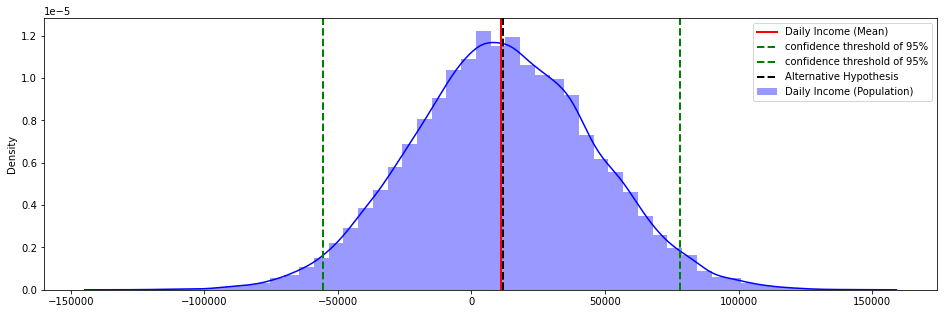

In [382]:
df_success_film_video_pop = np.random.normal(df_success_film_video['usd_goal_real'].mean(), df_success_film_video['usd_goal_real'].std(), 20000)

ci = stats.norm.interval(0.95, df_success_film_video['usd_goal_real'].mean(),df_success_film_video['usd_goal_real'].std())

plt.figure(figsize=(16,5))
sns.distplot(df_success_film_video_pop, label='Daily Income (Population)', color='blue')
plt.axvline(df_success_film_video['usd_goal_real'].mean(), color='red', linewidth=2, label='Daily Income (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(df_success_film_video_pop.mean() + t_stat*df_success_film_video_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(df_success_film_video_pop.mean() - t_stat*df_success_film_video_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

### III. Two Samples Independent Two Tailed

## Pengambilan Kesimpulan

Karena p-value lebih besar dari significant level 0.05, maka kita tidak bisa menolak null hipotesis (H0: diterima) yang artinya usd goal crowdfunding yang sukses untuk kategory Film & Video di US memiliki dampak yang cukup signifikan untuk ukuran keberhasilan crowdfunding di industri Film & Video secara keseluruhan.